In [81]:
import numpy as np
import cv2
import os
import shutil
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

In [3]:
def get_cropped_image(image_path):
    if not os.path.isfile(image_path):
        print("Error: Image file does not exist:", image_path)
        return None
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image:", image_path)
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print("No faces detected in the image:", image_path)
        return None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

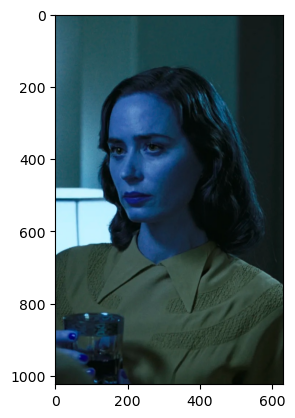

In [12]:
og_img = cv2.imread("./Test images/emily.jpeg")
plt.imshow(og_img)

In [5]:
path_to_data = "./dataset/"
path_to_crop_data = "./dataset/cropped/"

In [6]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [7]:
img_dirs

['./dataset/Leonardo Dicaprio',
 './dataset/Tom Cruise',
 './dataset/Emily Blunt',
 './dataset/Tom Hanks',
 './dataset/Natalie Portman',
 './dataset/cropped']

In [8]:
if os.path.exists(path_to_crop_data):
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [9]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

Leonardo Dicaprio
No faces detected in the image: ./dataset/Leonardo Dicaprio/images282.jpg
Generating cropped images in folder:  ./dataset/cropped/Leonardo Dicaprio
No faces detected in the image: ./dataset/Leonardo Dicaprio/images255.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images26.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images309.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images256.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images120.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images322.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images337.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/images121.jpg
No faces detected in the image: ./dataset/Leonardo Dicaprio/_121317676_leo_getty.jpg
Error: Unable to load image: ./dataset/Leonardo Dicaprio/.DS_Store
No faces detected in the image: ./dataset/Leonardo Dicaprio/images291.jpg
No faces detected

No faces detected in the image: ./dataset/Tom Cruise/Papademas-TopGun-Universe.jpg
No faces detected in the image: ./dataset/Tom Cruise/images263.jpg
No faces detected in the image: ./dataset/Tom Cruise/images129.jpg
No faces detected in the image: ./dataset/Tom Cruise/images128.jpg
No faces detected in the image: ./dataset/Tom Cruise/images100.jpg
No faces detected in the image: ./dataset/Tom Cruise/images272.jpg
No faces detected in the image: ./dataset/Tom Cruise/images138.jpg
No faces detected in the image: ./dataset/Tom Cruise/tom-cruise-topgun2-main.jpg
No faces detected in the image: ./dataset/Tom Cruise/images267.jpg
No faces detected in the image: ./dataset/Tom Cruise/image17.jpeg
No faces detected in the image: ./dataset/Tom Cruise/2Fmethode2Ftimes2Fprod2Fweb2Fbin2Fe1dce466-d2c1-11ec-8b2e-7dd06af1f28b.jpg
No faces detected in the image: ./dataset/Tom Cruise/images271.jpg
No faces detected in the image: ./dataset/Tom Cruise/image21.jpeg
No faces detected in the image: ./datase

No faces detected in the image: ./dataset/Tom Hanks/images298.jpg
No faces detected in the image: ./dataset/Tom Hanks/images271.jpg
No faces detected in the image: ./dataset/Tom Hanks/images265.jpg
No faces detected in the image: ./dataset/Tom Hanks/images305.jpg
No faces detected in the image: ./dataset/Tom Hanks/images106.jpg
No faces detected in the image: ./dataset/Tom Hanks/images17.jpg
No faces detected in the image: ./dataset/Tom Hanks/images270.jpg
No faces detected in the image: ./dataset/Tom Hanks/images258.jpg
Natalie Portman
Generating cropped images in folder:  ./dataset/cropped/Natalie Portman
No faces detected in the image: ./dataset/Natalie Portman/images321.jpg
No faces detected in the image: ./dataset/Natalie Portman/images334.jpg
No faces detected in the image: ./dataset/Natalie Portman/images320.jpg
No faces detected in the image: ./dataset/Natalie Portman/images122.jpg
No faces detected in the image: ./dataset/Natalie Portman/images240.jpg
No faces detected in the 

In [11]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

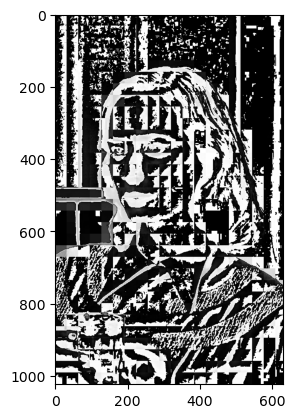

In [14]:
im_hr = w2d(og_img, 'db1', 5)
plt.imshow(im_hr, cmap='gray')

In [46]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
if 'cropped' in class_dict:
    class_dict.pop('cropped')
class_dict

{'Leonardo Dicaprio': 0,
 'Tom Cruise': 1,
 'Emily Blunt': 2,
 'Tom Hanks': 3,
 'Natalie Portman': 4}

In [47]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

[ WARN:0@9303.987] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Leonardo Dicaprio/Leonardo Dicaprio14.png'): can't open/read file: check file path/integrity
[ WARN:0@9304.284] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Leonardo Dicaprio/Leonardo Dicaprio88.png'): can't open/read file: check file path/integrity
[ WARN:0@9304.309] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Leonardo Dicaprio/Leonardo Dicaprio102.png'): can't open/read file: check file path/integrity
[ WARN:0@9304.918] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Tom Cruise/Tom Cruise30.png'): can't open/read file: check file path/integrity
[ WARN:0@9305.674] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Emily Blunt/Emily Blunt14.png'): can't open/read file: check file path/integrity
[ WARN:0@9305.731] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/Emily Blunt/Emily Blunt29.png'): can't open/read file: check file pa

In [48]:
len(X)

685

In [49]:
len(y)

685

In [50]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(685, 4096)

## Model Training

In [55]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearch
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [63]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', C=100))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.872093023255814

In [64]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.90      0.90      0.90        21
           2       0.95      0.88      0.91        48
           3       0.92      0.79      0.85        28
           4       0.85      0.83      0.84        42

    accuracy                           0.87       172
   macro avg       0.88      0.87      0.87       172
weighted avg       0.88      0.87      0.87       172



In [66]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [75]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.818694,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.598477,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.820598,{'logisticregression__C': 1}


In [77]:
best_estimators['svm'].score(X_test, y_test)

0.872093023255814

In [78]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8430232558139535

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimators['svm'].predict(X_test))
cm

array([[32,  0,  0,  1,  0],
       [ 0, 19,  0,  1,  1],
       [ 1,  1, 42,  0,  4],
       [ 5,  0,  0, 22,  1],
       [ 4,  1,  2,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

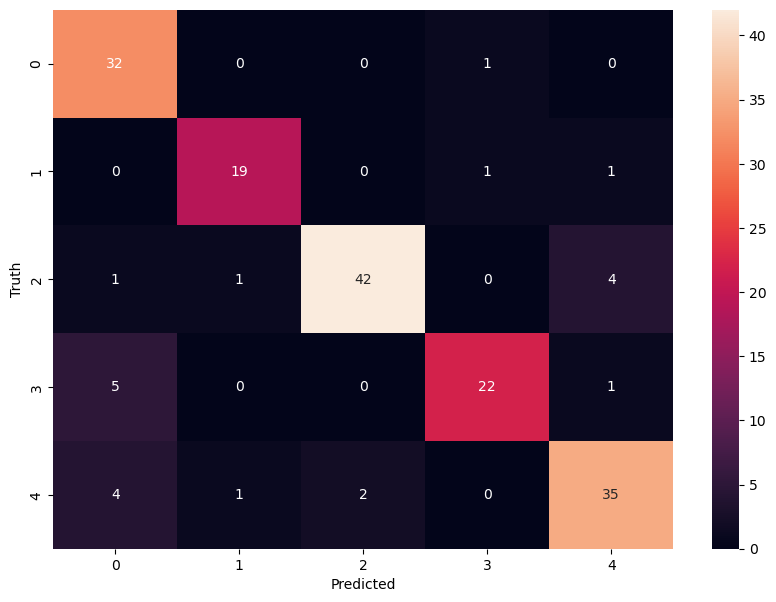

In [82]:
plt.figure(figsize = (10, 7 ))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save the Train model

In [84]:
!pip install joblib
import joblib
joblib.dump(best_estimators['svm'], 'saved_model.pkl')

DEPRECATION: graphql-ws 0.3.0 has a non-standard dependency specifier graphql-core>=2.0<3. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of graphql-ws or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


['saved_model.pkl']

In [87]:
import json
with open("class_dictionary.jason", "w") as f:
    f.write(json.dumps(class_dict))